# Lorenz Equations

In [62]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation as FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import linregress

In [63]:
%matplotlib notebook

## Problem 1
Write a function that implements the Lorenz equations. Let $\sigma = 10$, $\rho = 28$, $\beta = 8$ . Make a 3D plot of a solution to the Lorenz equations for an initial condition where $(x, y, z)$ are drawn randomly from a uniform distribution from −15 to 15. As usual, use `scipy.integrate.solve_ivp` to compute the solution.

In [7]:
def lorenz(t, x):
    """Implements Lorenz equations:
    
    dx/dt = σ(y − x)
    dy/dt = ρx − y − xz
    dz/dt = xy − βz
        
    Parameters:
        t (float): The time value t
        x ((3,) ndarray): The state values (x,y,z)
    Returns:
        ((3,) ndarray): The derivative values
    """
    return np.array([10*(x[1]-x[0]), 28*x[0]-x[1]-x[0]*x[2], x[0]*x[1] - (8/3)*x[2]])  #return the desired system

<IPython.core.display.Javascript object>


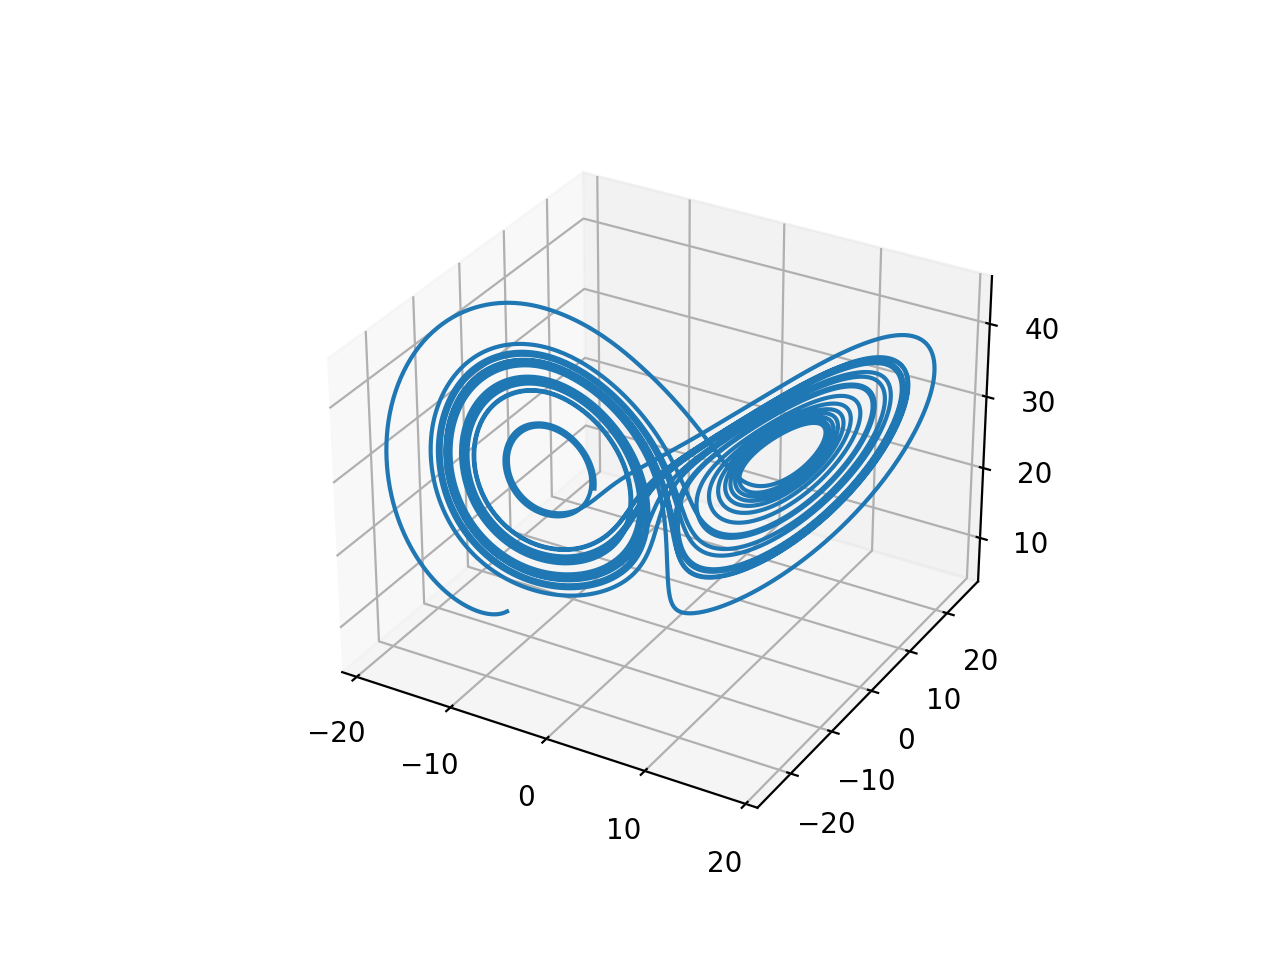

In [12]:
y0 = np.random.uniform(-15,15,(3,))      #draw a random initial condition
t_span = (0,25)
ts = np.linspace(0,25,10000)
sol = solve_ivp(lorenz, t_span, y0, t_eval=ts)    #solve the initial value problem

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(sol.y[0], sol.y[1], sol.y[2])    #plot the solutions
plt.show()

## Problem 2
To better visualize the Lorenz attractor, produce a single 3D plot displaying three solutions to the Lorenz equations, each with random initial conditions.

<IPython.core.display.Javascript object>


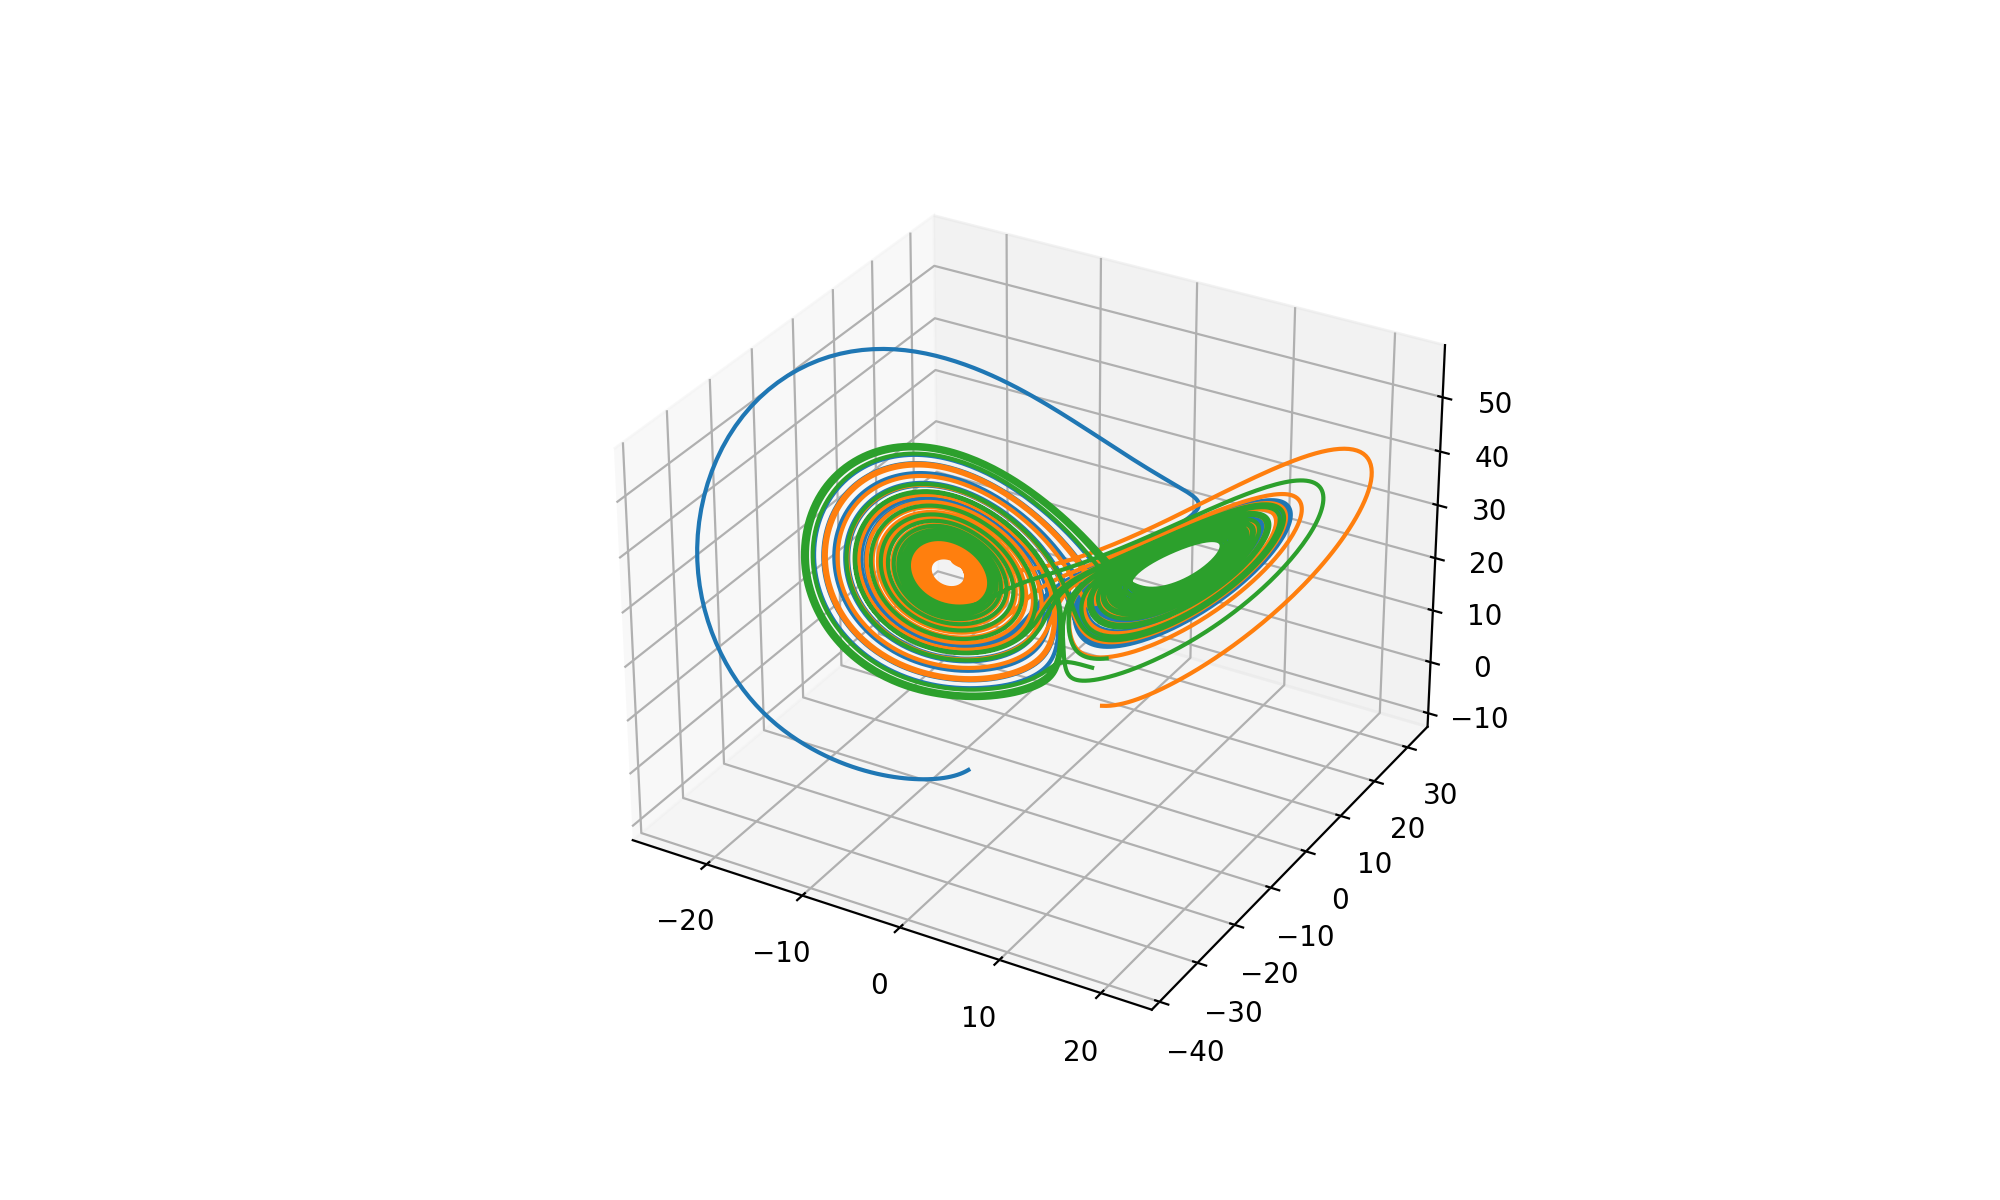

In [17]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(projection='3d')

for i in range(3):
    y0 = np.random.uniform(-15,15,(3,))      #draw a random initial condition
    t_span = (0,25)
    ts = np.linspace(0,25,10000)
    sol = solve_ivp(lorenz, t_span, y0, t_eval=ts)    #solve the initial value problem
    ax.plot(sol.y[0], sol.y[1], sol.y[2])    #plot the solutions
plt.show()

## Problem 3
Use `matplotlib.animation.FuncAnimation` to produce a 3D animation of two solutions to the Lorenz equations with similar initial conditions. To make similar initial conditions, draw $(x_1,y_1,z_1)$ randomly as before, and then produce $(x_2,y_2,z_2)$ by adding a small perturbation: `np.random.randn(3)*(1e-10)`. It will take several seconds before the separation between the two solutions will be noticeable.

The animation should have a point marker and the past trajectory curve for each solution. Save your animation as `lorenz_animation1.mp4`.

(Recall that you can display the saved animation in a Jupyter notebook by running the follwing code in a markdown cell):

In [40]:
y0 = np.random.uniform(-15,15,(3,))      #draw a random initial condition
t_span = (0,25)
ts = np.linspace(0,25,3000)
pert = y0 + np.random.rand(3)*(1e-2)

sol1 = solve_ivp(lorenz, t_span, y0, t_eval=ts)    #solve the initial value problem
sol2 = solve_ivp(lorenz, t_span, pert, t_eval=ts)    #solve the initial value problem

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

pt1 = plt.plot([],[],[],marker='o', color='r', label="Original")[0]    #create the first point and traj
traj1 = plt.plot([],[],[],color='r',alpha=0.5)[0]

pt2 = plt.plot([],[],[],marker='o', color='b', label="Perturbed")[0]    #create the second point and traj
traj2 = plt.plot([],[],[],color='b',alpha=0.5)[0]
plt.legend()
ax.set_xlim((-20, 20))
ax.set_ylim((-50, 50))
ax.set_zlim((-50, 50))

def update(i):            #make the update function
    pt1.set_data_3d(sol1.y[0,i], sol1.y[1,i], sol1.y[2,i])
    traj1.set_data_3d(sol1.y[0,:i+1], sol1.y[1,:i+1], sol1.y[2,:i+1])
    
    pt2.set_data_3d(sol2.y[0,i], sol2.y[1,i], sol2.y[2,i])
    traj2.set_data_3d(sol2.y[0,:i+1], sol2.y[1,:i+1], sol2.y[2,:i+1])
    
ani = animation.FuncAnimation(fig, update, frames=range(len(ts)), interval=5)
ani.save('lorenz_animation1.mp4')         #make and save the animation

<IPython.core.display.Javascript object>

<video src='lorenz_animation1.mp4' controls>

## Problem 4
The `solve_ivp` function allows users to specify error tolerances (similar to setting a value of $h$ for a Runge-Kutta method). Using a single random initial condition, produce two approximations by using the `solve_ivp` arguments `(atol=1e-15, rtol=1e-13)` for the first approximation and `(atol=1e-12, rtol=1e-10)` for the second.
As in the previous problem, use `FuncAnimation` to animate both solutions. Save the animation as `lorenz_animation2.mp4`.

In [49]:
y0 = np.random.uniform(-15,15,(3,))      #draw a random initial condition
t_span = (0,25)
ts = np.linspace(0,25,3000)

sol1 = solve_ivp(lorenz, t_span, y0, t_eval=ts, atol=1e-15, rtol=1e-13)    #solve the initial value problem
sol2 = solve_ivp(lorenz, t_span, y0, t_eval=ts, atol=1e-12, rtol=1e-10)    #solve the initial value problem

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

pt1 = plt.plot([],[],[],marker='o', color='r')[0]    #create the first point and traj
traj1 = plt.plot([],[],[],color='r',alpha=0.5)[0]

pt2 = plt.plot([],[],[],marker='o', color='b')[0]    #create the second point and traj
traj2 = plt.plot([],[],[],color='b',alpha=0.5)[0]
ax.set_xlim((-20, 20))
ax.set_ylim((-50, 50))
ax.set_zlim((-50, 50))

def update(i):            #make the update function
    pt1.set_data_3d(sol1.y[0,i], sol1.y[1,i], sol1.y[2,i])
    traj1.set_data_3d(sol1.y[0,:i+1], sol1.y[1,:i+1], sol1.y[2,:i+1])
    
    pt2.set_data_3d(sol2.y[0,i], sol2.y[1,i], sol2.y[2,i])
    traj2.set_data_3d(sol2.y[0,:i+1], sol2.y[1,:i+1], sol2.y[2,:i+1])
    
ani = animation.FuncAnimation(fig, update, frames=range(len(ts)), interval=5)
ani.save('lorenz_animation2.mp4')     #make and save the animation

<IPython.core.display.Javascript object>

<video src="lorenz_animation2.mp4" controls>

## Problem 5
Estimate the Lyapunov exponent of the Lorenz equations by doing the following:
* Produce an initial condition that already lies on the attractor. This can be done by using a random "dummy" initial condition, approximating the resulting solution to the Lorenz system for a short time, and then using the endpoint of that solution (which is now on the attractor) as the desired intital condition.
* Produce a second initial condition by adding a small perturbation to the first (as before).
* For both initial conditions, use `solve_ivp` to produce approximate solutions for $0 \leq t \leq 10$.
* Compute $||\delta(t)||$ by taking the norm of the vector difference between the two solutions for each value of $t$.
* Use `scipy.stats.linregress` to calculate a best-fit line for $\log(||\delta(t)||)$ against $t$.
* The slope of the resulting best-fit line is an approximation of the Lyapunov exponent $\lambda$.

Produce a plot similar to Figure 1.3 using `plt.semilogy`.

Hint: Remember that the best-fit line you calculated corresponds to a best-fit exponential for $||\delta(t)||$. If `a` and `b` are the slope and intercept of the best-fit line, the best-fit exponential can be plotted using `plt.semilogy(t,np.exp(a*t+b))`.

<IPython.core.display.Javascript object>


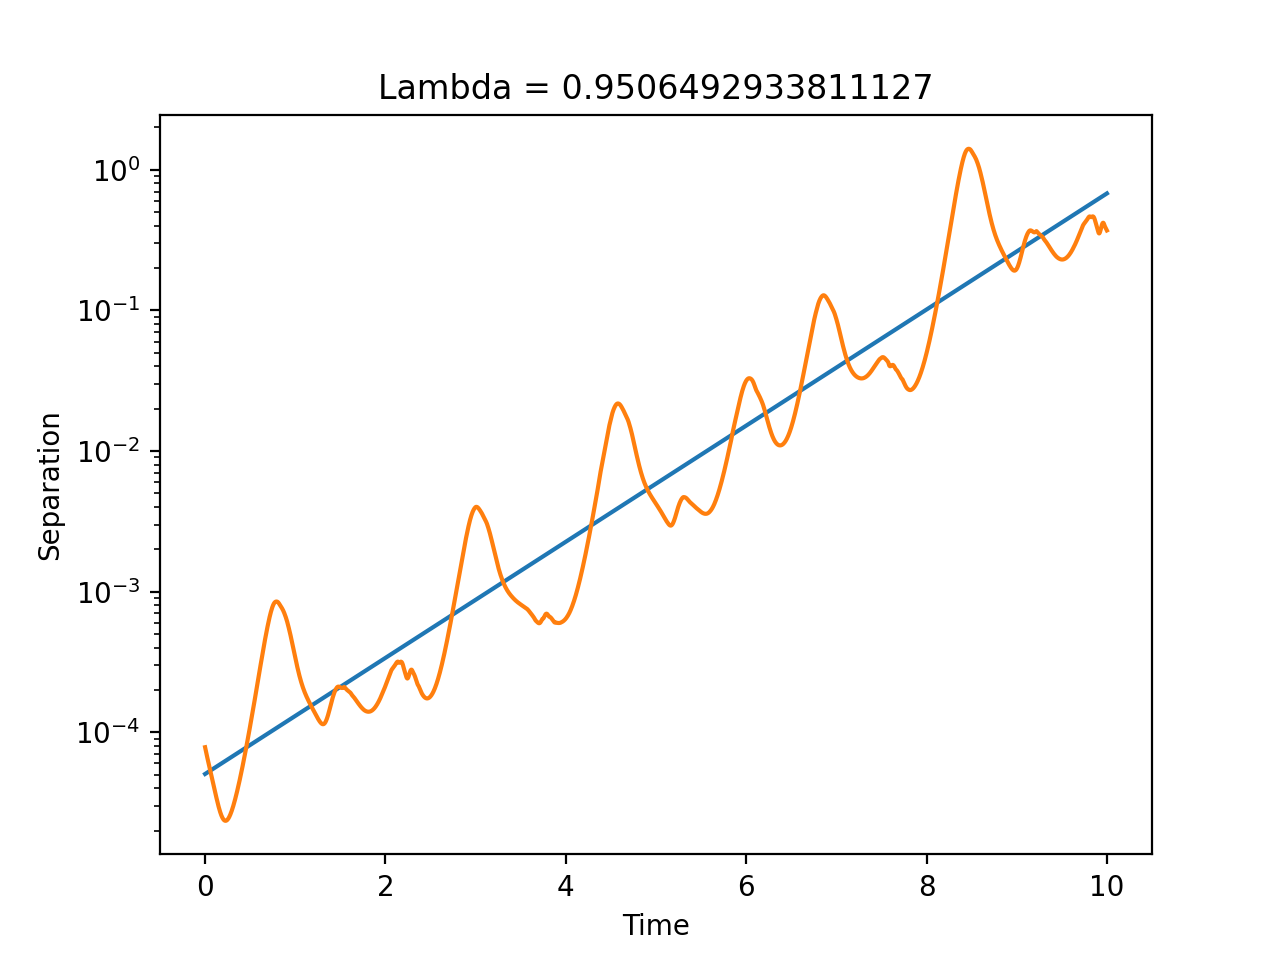

In [109]:
y0 = np.random.uniform(-15,15,(3,))      #draw a random initial condition
t_span1 = (0,4)
ts1 = np.linspace(0,4,4000)
sol = solve_ivp(lorenz, t_span1, y0, t_eval=ts1)    
y0 = np.array([sol.y[0][-1], sol.y[1][-1], sol.y[2][-1]])   #get the endpoint of the short system
y1 = y0 + np.random.rand(3)*(1e-4)    #create our perturbation

t_span = (0,10)
ts = np.linspace(0,10,4000)

sol1 = solve_ivp(lorenz, t_span, y0, t_eval=ts)   #solve the original and perturbed
sol2 = solve_ivp(lorenz, t_span, y1, t_eval=ts)

d_norm = np.linalg.norm(sol1.y-sol2.y, axis=0)     #calculate the norm between the two solutions

a, b = linregress(ts, np.log(d_norm))[:2]       #get the coefficients of the regression

plt.semilogy(ts, np.exp(a*ts+b))
plt.plot(ts, d_norm)
plt.xlabel('Time')
plt.ylabel('Separation')
plt.title('Lambda = '+str(a))
plt.show()